In [10]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# specific command for jupyter notebooks to show plots inline
%matplotlib inline

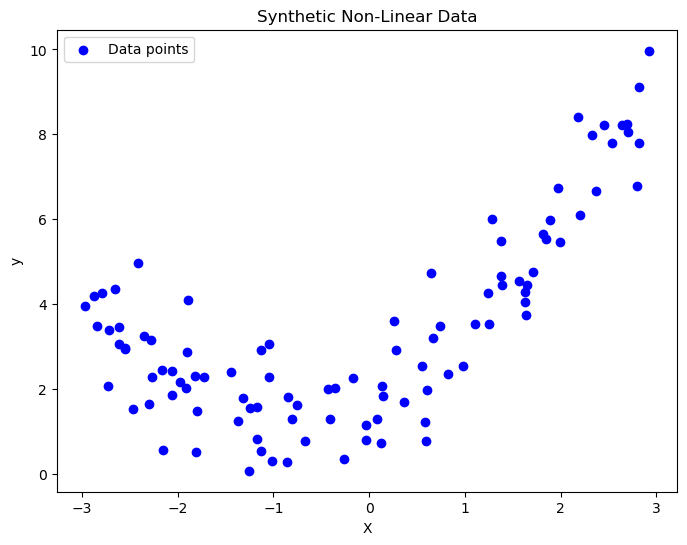

In [11]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate 100 random x values between -3 and 3
m = 100
X = 6 * np.random.rand(m, 1) - 3

# Generate y values based on a quadratic equation: y = 0.5x^2 + x + 2 + noise
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Non-Linear Data")
plt.legend()
plt.show()

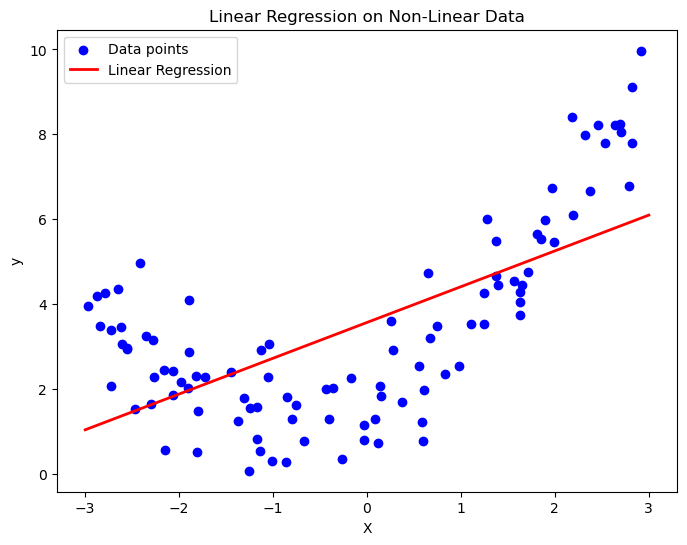

In [12]:
# Fit a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

#predict values
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_pred_lin = lin_reg.predict(X_new)

#plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_new, y_pred_lin, color='red', linewidth=2, label='Linear Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression on Non-Linear Data")
plt.legend()
plt.show()

In [13]:
# Implemention of Polynomial Regression
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(f"Original feature shape: {X.shape}")
print(f"Transformed feature shape (degree {degree}): {X_poly.shape}")
print(f"First 5 original features:\n{X[:5]}")
print(f"First 5 transformed features:\n{X_poly[:5]}")


Original feature shape: (100, 1)
Transformed feature shape (degree 2): (100, 2)
First 5 original features:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
First 5 transformed features:
[[-0.75275929  0.56664654]
 [ 2.70428584  7.3131619 ]
 [ 1.39196365  1.93756281]
 [ 0.59195091  0.35040587]
 [-2.06388816  4.25963433]]


In [14]:
# Fit the Linear Regression model on the polynomial features
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)

# Print the learned coefficients
print(f"Intercept (bias): {poly_reg_model.intercept_}")
print(f"Coefficients: {poly_reg_model.coef_}")

Intercept (bias): [1.78134581]
Coefficients: [[0.93366893 0.56456263]]


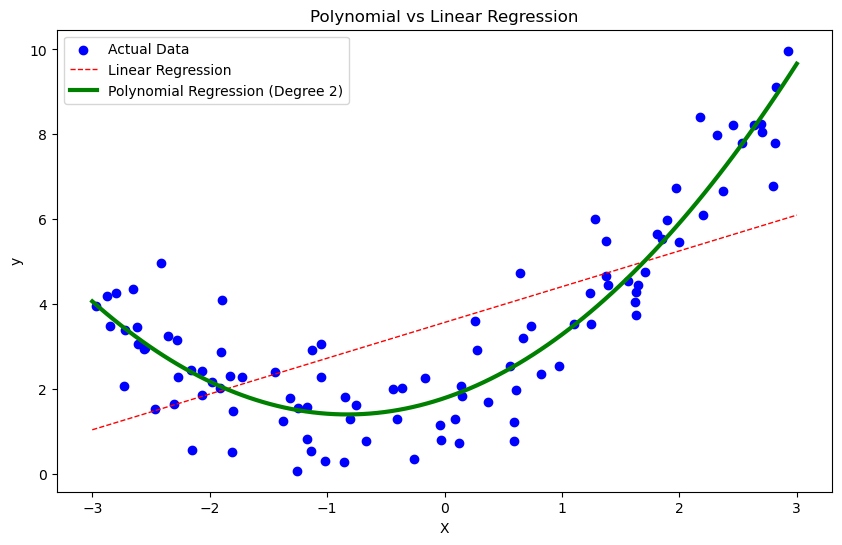

In [16]:
# Transform the prediction line inputs
X_new_poly = poly_features.transform(X_new)

# Predict using the transformed inputs
y_poly_pred = poly_reg_model.predict(X_new_poly)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_new, y_pred_lin, 'r--', label='Linear Regression', linewidth=1)
plt.plot(X_new, y_poly_pred, 'g-', label=f'Polynomial Regression (Degree {degree})', linewidth=3)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial vs Linear Regression")
plt.legend()
plt.show()

In [17]:
# Calculate RMSE for Linear Model
y_pred_lin = lin_reg.predict(X)
rmse_lin = np.sqrt(mean_squared_error(y, y_pred_lin))
r2_lin = r2_score(y, y_pred_lin)

# Calculate RMSE for Polynomial Model
y_pred_poly = poly_reg_model.predict(X_poly)
rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))
r2_poly = r2_score(y, y_pred_poly)

print("--- Performance Comparison ---")
print(f"Linear Regression RMSE: {rmse_lin:.4f}")
print(f"Linear Regression R2:   {r2_lin:.4f}")
print("-" * 30)
print(f"Polynomial Regression RMSE: {rmse_poly:.4f}")
print(f"Polynomial Regression R2:   {r2_poly:.4f}")

--- Performance Comparison ---
Linear Regression RMSE: 1.7391
Linear Regression R2:   0.4260
------------------------------
Polynomial Regression RMSE: 0.8816
Polynomial Regression R2:   0.8525
